In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [5]:
pelvis = pd.read_csv('David-30-pokus01-2Senzory/Xsens_DOT_2_D422CD006474_20250409_110429.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-30-pokus01-2Senzory/Xsens_DOT_4_D422CD006380_20250409_110429.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-30-pokus01-2Senzory/Xsens_DOT_3_D422CD006379_20250409_110429.csv', skiprows= 7,  sep=',')

In [6]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [7]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [8]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [9]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,0.540382,5591.778500
std,5.793029,3235.630951
min,-85.942635,0.000000
25%,0.781904,2795.889250
50%,1.125002,5591.778500
75%,1.371982,8387.667750
max,59.187630,11183.557000


In [10]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,-1.770410,5591.778500
std,4.954897,3235.630951
min,-69.020798,0.000000
25%,-1.402752,2795.889250
50%,-1.280104,5591.778500
75%,-1.150375,8387.667750
max,62.286808,11183.557000


In [11]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,672.000000,672.000000
mean,0.709059,5591.778500
std,2.340340,3235.630951
min,-11.957610,0.000000
25%,0.225819,2795.889250
50%,0.302616,5591.778500
75%,0.474241,8387.667750
max,23.478655,11183.557000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

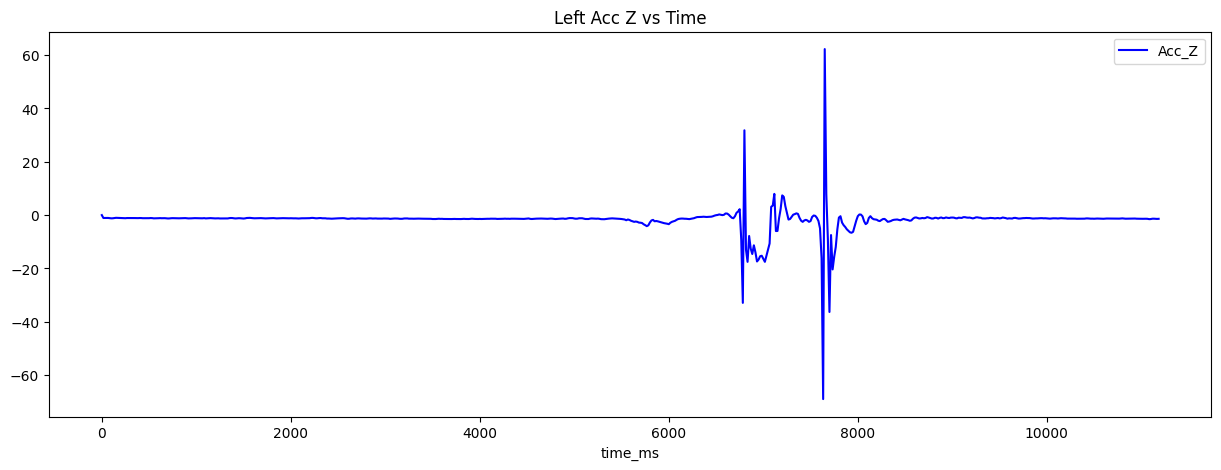

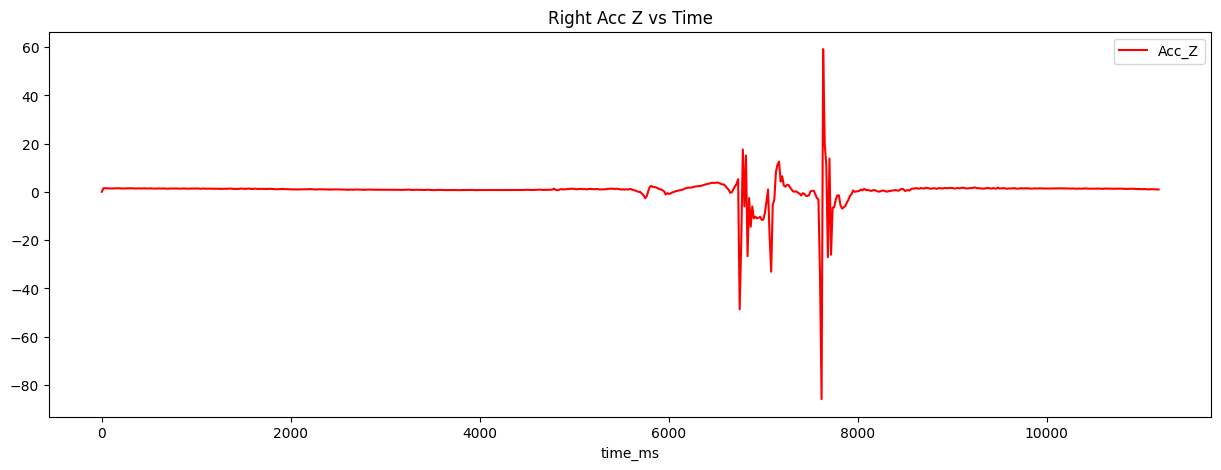

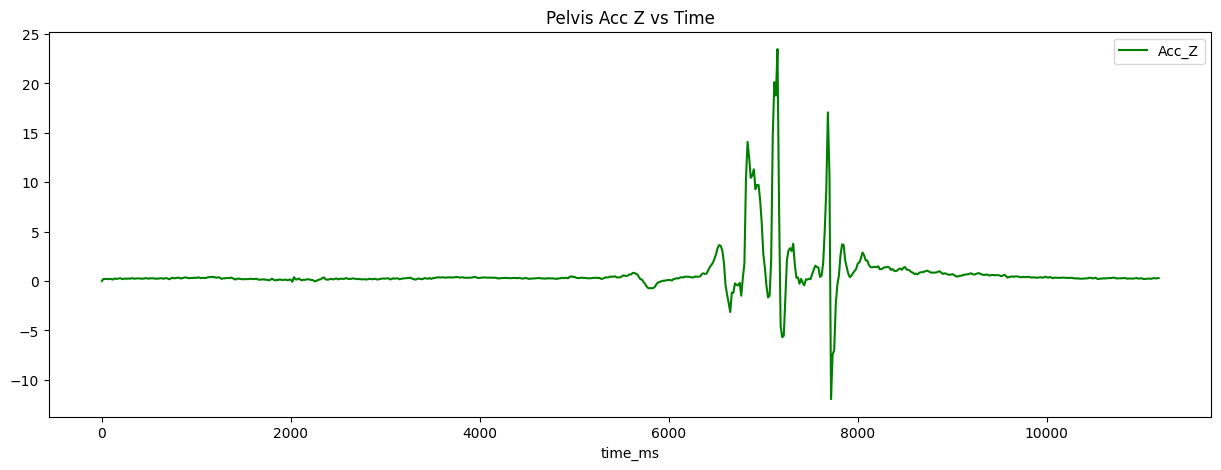

In [12]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')